# RUN FULL ML PIPELINE

# Credit Default Dataset

In [ ]:
!git clone https://github.com/kartikdhoke9923/ML_Projects.git
%cd ML_Projects
!pip install -r requirements.txt
!python src/components/data_ingestion.py

### Life cycle of Machine Learning Project

- Understanding the problem statement
- Data collection
- Data checks to perform
- Exploratory Data analysis
- Data pre-processing
- Model Training 
- Model Evaluation
- Parameter Tuning and Choosing best model

# 1) Problem Statement
### To Predict whether a loan applicant will default (1) or not (0)
#### TARGET = 1 - Customer DEFAULTED on the loan
- Missed payments
- Failed to repay on time
- Bank lost or is at risk of losing money
#### TARGET = 0 - Customer REPAID the loan
- Paid installments properly
- Low risk
- “Good” customer

# 2) Data Collection
- Data source - https://www.kaggle.com/competitions/home-credit-default-risk/data?select=application_train.csv
- The data consists of 122 columns and 300000+ rows

# 2.1 Importing Data and required Packages

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Importing the CSV data as pandas dataframe

In [2]:
df = pd.read_csv("data/application_train.csv")

## Top 5 record 

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Shape of the dataset

In [4]:
df.shape           # Total 122 columns 

(307511, 122)

# 2.2 DataSet Information

In [5]:
def group_columns(df):
    groups={
        "AMOUNT": [a for a in df.columns if "AMT" in a],
        "ANNUITY_INCOME": [b for b in df.columns if ("INCOME" in b) or ("ANNUITY" in b)],
        "CREDIT_BUREAU": [c for c in df.columns if "BUREAU" in c],
        "DOCUMENTS": [d for d in df.columns if "DOCUMENT" in d],
        "AGE_EMPLOYMENT": [e for e in df.columns if e.startswith("DAYS_")],
        "FLAGS": [f for f in df.columns if f.startswith("FLAG_")],
        "TOtal CATEGORICAL FEATURES": df.select_dtypes(include="object").columns.tolist(),
        "Total NUMERICAL FEATURES":[feature for feature in df.columns if df[feature].dtype!="O"]
    }
    return groups

In [6]:
groups = group_columns(df)

for k, v in groups.items():
    print(f"{k} → {len(v)}")

AMOUNT → 10
ANNUITY_INCOME → 3
CREDIT_BUREAU → 6
DOCUMENTS → 20
AGE_EMPLOYMENT → 5
FLAGS → 28
TOtal CATEGORICAL FEATURES → 16
Total NUMERICAL FEATURES → 106


# 3.1 Data Checks to perfom
- Checking missing values
- Checking duplicates
- Data type
- Checking number of unique values in data, each columns
- Checking Statistics of dataset
- Checking various categories Present in different categorical columns
- checkimg Correlation


## 3.1 Checking missing values

In [7]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

### Here threre are so much missing values in various columns so we are checking if missing values percentage is greater than 60 percent so we will consider as a non useful column and drop them

In [8]:
means= df.isna().mean() * 100               # it is working boolean and then taking average
c=[x for x,  y in means.items() if y>60] 
c

['OWN_CAR_AGE',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'FLOORSMIN_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'FLOORSMIN_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE']

### Removing these column and checing the shape of data

In [9]:
df= df.drop(columns=c)
df.shape

(307511, 105)

## 3.2 Checking Duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

### There are no duplicates in the data set

# 3.2 Checking data type

In [11]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 105 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

# 3.3 Checking number of unique values in data, each columns

In [12]:
df.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 105, dtype: int64

# 3.4 Checking Statistics of the data

In [13]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### From above description of numeric data You can see count of children max 19 this is outlier 
#### DAYS_EMPLOYED MAX = 365243 This is a known dirty value Means: “Not employed / missing” MUST be fixed:
#### Defaulters have a higher repayment burden as shown below means annuty and income are strong predictor

In [14]:
df.groupby('TARGET')['AMT_ANNUITY'].mean()

TARGET
0    27163.623349
1    26481.744290
Name: AMT_ANNUITY, dtype: float64

In [15]:
(df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']).groupby(df['TARGET']).mean()

TARGET
0    0.180530
1    0.185482
dtype: float64

## DAYS_EMPLOYED MAX(it should be negative but) = 365243 This is a known dirty value Means: “Not employed / missing” MUST be fixed

In [16]:
df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

In [17]:
df['DAYS_EMPLOYED_MISSING'] = df['DAYS_EMPLOYED'].isna().astype(int)
df['EMPLOYED_YEARS'] = -df['DAYS_EMPLOYED'] / 365             #  also converting to years

### Now again checking statistics of the same 

In [18]:
df[['DAYS_EMPLOYED','DAYS_EMPLOYED_MISSING']].describe()

,DAYS_EMPLOYED,DAYS_EMPLOYED_MISSING
count,252137.000000,307511.000000
mean,-2384.169325,0.180072
std,2338.360162,0.384248
min,-17912.000000,0.000000
25%,-3175.000000,0.000000
50%,-1648.000000,0.000000
75%,-767.000000,0.000000
max,0.000000,1.000000


In [19]:
df['EMPLOYED_YEARS'].fillna(df['EMPLOYED_YEARS'].median(), inplace=True)
df.drop(["DAYS_EMPLOYED"],axis=1,inplace=True)
df.drop(["DAYS_EMPLOYED_MISSING"],axis=1,inplace=True)

In [20]:
df.shape

(307511, 105)

## Here an id column is present which is useless do removing it

In [21]:
id_cols = ['SK_ID_CURR']
df.drop(columns=id_cols, inplace=True)

# 3.7 Explorating Data
Checking various categories Present in different categorical columns

In [22]:
groups = group_columns(df)

for k, v in groups.items():
    print(f"{k} → {len(v)}")

AMOUNT → 10
ANNUITY_INCOME → 3
CREDIT_BUREAU → 6
DOCUMENTS → 20
AGE_EMPLOYMENT → 4
FLAGS → 28
TOtal CATEGORICAL FEATURES → 15
Total NUMERICAL FEATURES → 89


In [23]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'EMPLOYED_YEARS'],
      dtype='object', length=104)

# Feature engineerinng Creating new Feature for DAYS BIRTH TO AGE
Number of days BEFORE the loan application that the client was born is BIRTH AGE

In [24]:
df['AGE_YEARS'] = -df['DAYS_BIRTH'] / 365
df.drop(["DAYS_BIRTH"],axis=1,inplace=True)

# Dropping unnecessary Binary columns 

In [25]:
binary_columns=[]
for col in df.columns:
    value_percentages = df[col].value_counts(normalize=True) * 100
    if len(value_percentages) == 2:
        binary_columns.append(col)
        drop_binaries = []

binary_columns.remove("TARGET")

for col in binary_columns:
    dist = df[col].value_counts(normalize=True)
    minority_pct = dist.min() * 100
    if minority_pct < 10:
        drop_binaries.append(col)

df.drop(columns=drop_binaries, inplace=True)

print("Dropped columns:", drop_binaries)


Dropped columns: ['NAME_CONTRACT_TYPE', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


In [26]:
df.shape

(307511, 76)

### Here shape of column reduced to 67 from 122 columns

# 4 Explorating data (visualisations)

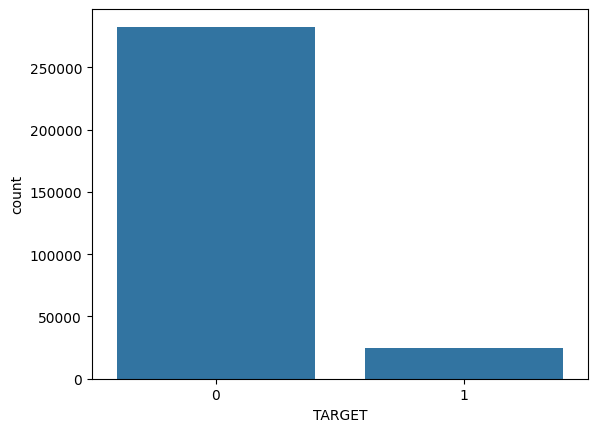

In [27]:
sns.countplot(x="TARGET", data=df)
plt.show()

In [28]:
df["TARGET"].value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

### Here 91 percentage of "0" class data and only 8.07% of "1" Class data

## "PROCESS_START" removing this type of columns

In [29]:
ps=[x for x in df.columns if "PROCESS_START" in x]
df=df.drop(columns=ps)
df.shape

(307511, 74)

In [30]:
int_cols = df.select_dtypes(include=["int64", "float64"])
int_cols.corr()["TARGET"].drop("TARGET").abs().sort_values(ascending=False)

EXT_SOURCE_3                  0.178919
EXT_SOURCE_2                  0.160472
EXT_SOURCE_1                  0.155317
AGE_YEARS                     0.078239
EMPLOYED_YEARS                0.063368
                                ...   
AMT_INCOME_TOTAL              0.003982
AMT_REQ_CREDIT_BUREAU_DAY     0.002704
AMT_REQ_CREDIT_BUREAU_QRT     0.002022
AMT_REQ_CREDIT_BUREAU_HOUR    0.000930
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
Name: TARGET, Length: 61, dtype: float64

### From these we can conclude that AGE_YEARS, AGE_YEARS, EXT_SOURCE_2, EXT_SOURCE_3 are good predictors where as AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_HOUR , AMT_REQ_CREDIT_BUREAU_QRT and etc are weak predictor 
- But here income_total can be weak but when checked alongside annutythen its the most important feature                                            

<Axes: xlabel='TARGET'>

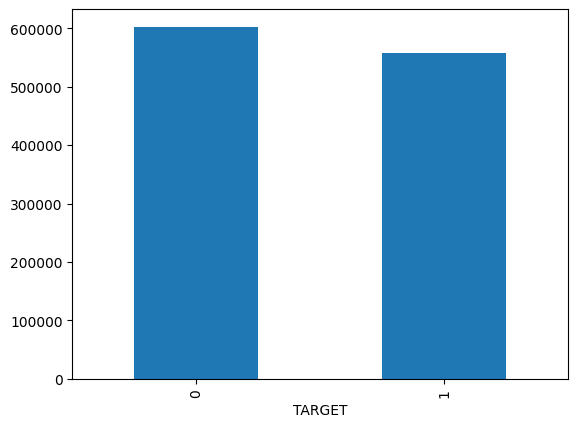

In [31]:
df.groupby('TARGET')['AMT_CREDIT'].mean().plot(kind='bar')

In [32]:
df.to_csv(
    r"E:\Machine Learning Project\notebook\data\cleaned.csv",
    index=False
)